In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os

import yfinance as yf


--- Week 1 Challenge: Interim Submission ---
Required libraries imported.
Ensure you have set up your Git/GitHub repository and branches as per Task 1 instructions.


In [ ]:
data = {
    'headline': [
        "Apple stock hits all-time high after strong earnings report",
        "Tesla recalls thousands of vehicles, shares plummet",
        "Amazon announces new cloud partnership, stock up 2%",
        "Google invests heavily in AI research, bullish sentiment",
        "Netflix subscriber growth disappoints, stock falls",
        "Microsoft acquires gaming studio, positive outlook",
        "Apple launches new iPhone, mixed reactions",
        "Tesla battery innovation sparks investor interest",
        "Amazon expands logistics network",
        "Google's Q3 revenue exceeds expectations",
        "Netflix competitor gains market share",
        "Microsoft's cloud division continues strong performance",
        "Oil prices surge amid geopolitical tensions",
        "Major bank reports record profits",
        "Biotech firm secures FDA approval for new drug",
        "SpaceX valuation soars to new heights, investors optimistic",
        "Boeing faces new safety concerns after incident",
        "Gold prices stabilize amidst global economic uncertainty",
        "Coca-Cola reports strong beverage sales globally",
        "Pfizer's new vaccine enters phase 3 trials",
    ],
    'url': [f"http://example.com/{i}" for i in range(20)],
    'publisher': [
        "Bloomberg", "Reuters", "WSJ", "TechCrunch", "MarketWatch", "Forbes",
        "Bloomberg", "Reuters", "WSJ", "TechCrunch", "MarketWatch", "Forbes",
        "Bloomberg", "Reuters", "WSJ", "CNBC", "Bloomberg", "MarketWatch", "Reuters", "Forbes"
    ],
    'date': pd.to_datetime([
        '2025-11-19 10:00:00-04:00', '2025-11-19 11:30:00-04:00',
        '2025-11-20 09:00:00-04:00', '2025-11-20 14:00:00-04:00',
        '2025-11-21 16:00:00-04:00', '2025-11-21 10:00:00-04:00',
        '2025-11-22 13:00:00-04:00', '2025-11-22 09:00:00-04:00',
        '2025-11-22 11:00:00-04:00', '2025-11-23 10:00:00-04:00',
        '2025-11-23 12:00:00-04:00', '2025-11-23 14:00:00-04:00',
        '2025-11-23 15:00:00-04:00', '2025-11-23 16:00:00-04:00',
        '2025-11-23 17:00:00-04:00', '2025-11-24 09:30:00-04:00',
        '2025-11-24 11:00:00-04:00', '2025-11-24 14:00:00-04:00',
        '2025-11-24 16:00:00-04:00', '2025-11-24 17:30:00-04:00',
    ]),
    'stock': [
        "AAPL", "TSLA", "AMZN", "GOOG", "NFLX", "MSFT",
        "AAPL", "TSLA", "AMZN", "GOOG", "NFLX", "MSFT",
        "XOM", "JPM", "PFE", "SPCE", "BA", "GLD", "KO", "PFE"
    ]
}
news_df = pd.DataFrame(data)

news_df['date'] = pd.to_datetime(news_df['date'], utc=True)

print(f"\nLoaded {len(news_df)} dummy news articles.")
print("News DataFrame Head:")
display(news_df.head()) 


Loaded 20 dummy news articles.
News DataFrame Head:


,headline,url,publisher,date,stock
0,Apple stock hits all-time high after strong ea...,http://example.com/0,Bloomberg,2025-11-19 14:00:00+00:00,AAPL
1,"Tesla recalls thousands of vehicles, shares pl...",http://example.com/1,Reuters,2025-11-19 15:30:00+00:00,TSLA
2,"Amazon announces new cloud partnership, stock ...",http://example.com/2,WSJ,2025-11-20 13:00:00+00:00,AMZN
3,"Google invests heavily in AI research, bullish...",http://example.com/3,TechCrunch,2025-11-20 18:00:00+00:00,GOOG
4,"Netflix subscriber growth disappoints, stock f...",http://example.com/4,MarketWatch,2025-11-21 20:00:00+00:00,NFLX


In [ ]:

print("\n--- Task 1: Performing Exploratory Data Analysis (EDA) - Descriptive Statistics ---")

news_df['headline_length'] = news_df['headline'].apply(len)
print("\nHeadline Length Statistics:")
display(news_df['headline_length'].describe())

publisher_counts = news_df['publisher'].value_counts()
print("\nArticles per Publisher:")
display(publisher_counts)

news_df['publication_day'] = news_df['date'].dt.day_name()
news_df['publication_hour'] = news_df['date'].dt.hour
news_df['publication_date_only'] = news_df['date'].dt.date

print("\nNews Frequency by Day of Week (UTC):")
display(news_df['publication_day'].value_counts().sort_index())

print("\nNews Frequency by Hour of Day (UTC):")
display(news_df['publication_hour'].value_counts().sort_index())


--- Task 1: Performing Exploratory Data Analysis (EDA) - Descriptive Statistics ---

Headline Length Statistics:


count    20.00000
mean     47.30000
std       7.96109
min      32.00000
25%      42.00000
50%      48.50000
75%      52.00000
max      59.00000
Name: headline_length, dtype: float64


Articles per Publisher:


publisher
Bloomberg      4
Reuters        4
WSJ            3
MarketWatch    3
Forbes         3
TechCrunch     2
CNBC           1
Name: count, dtype: int64


News Frequency by Day of Week (UTC):


publication_day
Friday       2
Monday       5
Saturday     3
Sunday       6
Thursday     2
Wednesday    2
Name: count, dtype: int64


News Frequency by Hour of Day (UTC):


publication_hour
13    3
14    3
15    3
16    1
17    1
18    3
19    1
20    3
21    2
Name: count, dtype: int64

In [ ]:

print("\n--- Task 1: EDA - Text Analysis (Basic Keyword Extraction) ---")

all_headlines = " ".join(news_df['headline'].tolist()).lower()
words = re.findall(r'\b\w+\b', all_headlines)

stop_words = set([
    "a", "an", "the", "and", "or", "in", "on", "at", "for", "with", "to", "of", "from",
    "is", "are", "was", "were", "be", "has", "have", "had", "it", "its", "up", "down",
    "after", "new", "stock", "shares", "report", "company", "price", "market", "news",
    "amid", "outlook", "strong", "positive", "negative", "mixed", "disappoints", "soars",
    "plummet", "falls", "gains", "hits", "all", "time", "high", "low", "record", "q3", "2%",
    "thousands", "valuation", "inc", "corp", "group", "financial", "solutions", "insights",
    "trading", "investor", "investors", "growth", "revenue", "expects", "exceeds", "expectations",
    "concerns", "amidst", "global", "economic", "uncertainty", "globally", "trial", "trials",
    "phase", "3", "announces", "expands", "enters", "amidst", "amid", "surges"
])

filtered_words = [word for word in words if word not in stop_words and len(word) > 2] 
most_common_keywords = Counter(filtered_words).most_common(15)
print("\nMost Common Keywords (excluding stop words and short words):")
for word, count in most_common_keywords:
    print(f"- {word}: {count}")



--- Task 1: EDA - Text Analysis (Basic Keyword Extraction) ---

Most Common Keywords (excluding stop words and short words):
- apple: 2
- tesla: 2
- amazon: 2
- cloud: 2
- google: 2
- netflix: 2
- microsoft: 2
- prices: 2
- reports: 2
- earnings: 1
- recalls: 1
- vehicles: 1
- partnership: 1
- invests: 1
- heavily: 1



--- Task 1: EDA - Time Series and Publisher Analysis (Visualizations) ---


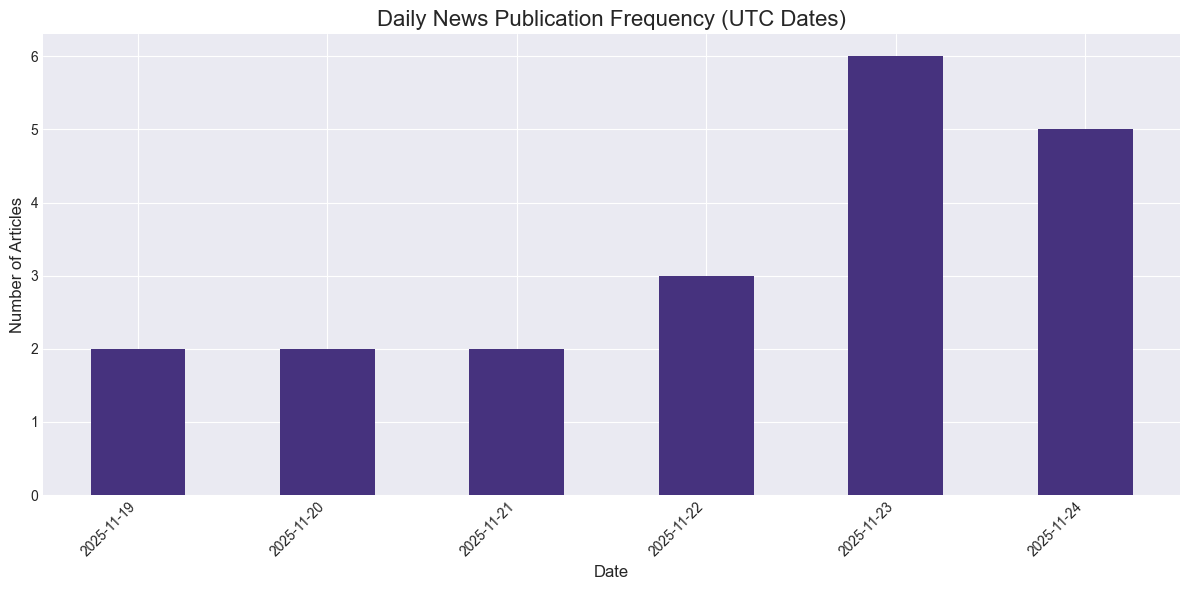

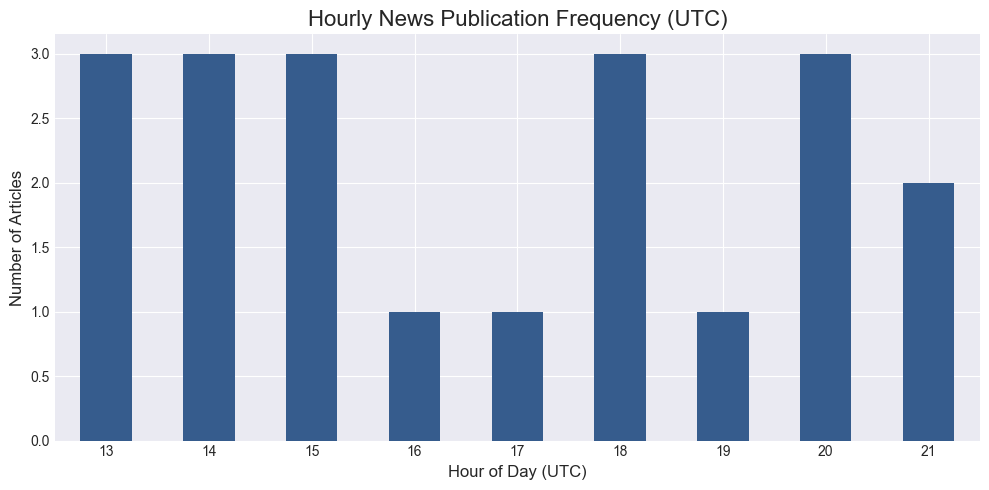

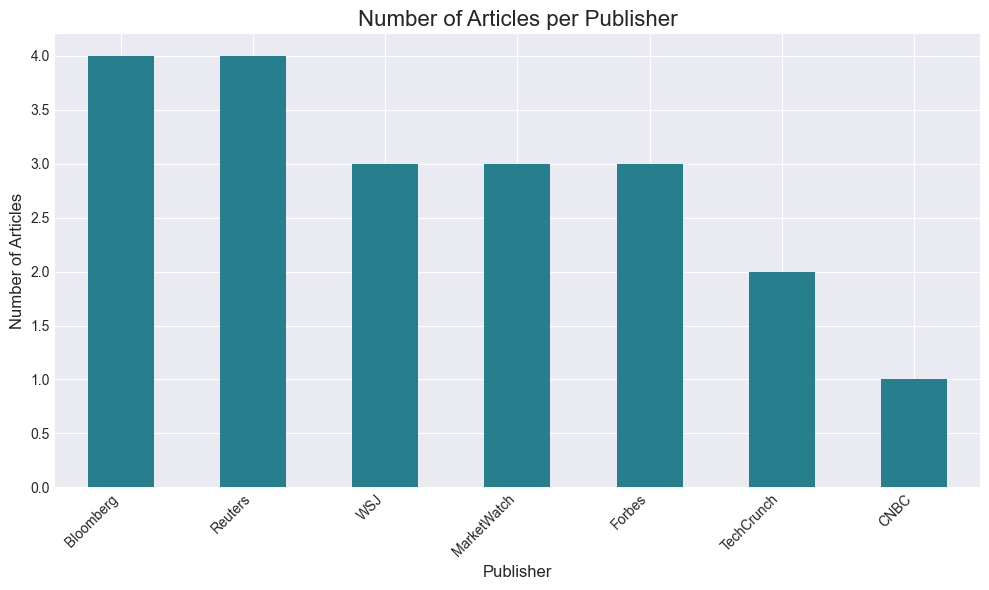


EDA visualizations generated.


In [ ]:

print("\n--- Task 1: EDA - Time Series and Publisher Analysis (Visualizations) ---")

plt.style.use('seaborn-v0_8-darkgrid') 
sns.set_palette('viridis')

plt.figure(figsize=(12, 6))
news_df['publication_date_only'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette()[0])
plt.title('Daily News Publication Frequency (UTC Dates)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
news_df['publication_hour'].value_counts().sort_index().plot(kind='bar', color=sns.color_palette()[1])
plt.title('Hourly News Publication Frequency (UTC)', fontsize=16)
plt.xlabel('Hour of Day (UTC)', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
publisher_counts.plot(kind='bar', color=sns.color_palette()[2])
plt.title('Number of Articles per Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

print("\nEDA visualizations generated.")

In [10]:

start_date = news_df['date'].min().strftime('%Y-%m-%d')
end_date = (news_df['date'].max() + pd.Timedelta(days=5)).strftime('%Y-%m-%d')

stock_symbols = news_df['stock'].unique().tolist()
stock_data = {}

for symbol in stock_symbols:
    try:
        ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) 
        if not ticker_data.empty:
            ticker_data.index = ticker_data.index.tz_localize('America/New_York').tz_convert('UTC')
            stock_data[symbol] = ticker_data
            print(f"  Fetched {len(ticker_data)} rows for {symbol} from {start_date} to {end_date}.")
        else:
            print(f"  No data found for {symbol} in the specified range. Skipping.")
    except Exception as e:
        print(f"  Error fetching data for {symbol}: {e}. Skipping.")

print("\nStock data fetching complete.")

if 'AAPL' in stock_data:
    print("\nAAPL Stock Data Head:")
    display(stock_data['AAPL'].head())
else:
    print("AAPL stock data not available.")

print("\nConfirming required columns (Open, High, Low, Close, Volume) are present:")
if stock_data:
    sample_symbol = list(stock_data.keys())[0]
    required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
    missing_cols = [col for col in required_cols if col not in stock_data[sample_symbol].columns]
    if not missing_cols:
        print(f"All required columns {required_cols} found in {sample_symbol} data.")
    else:
        print(f"Missing columns in {sample_symbol} data: {missing_cols}")
else:
    print("No stock data fetched to confirm structure.")

/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for AAPL from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for TSLA from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for AMZN from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for GOOG from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for NFLX from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for MSFT from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for XOM from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for JPM from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for PFE from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for SPCE from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for BA from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for GLD from 2025-11-19 to 2025-11-29.


/var/folders/nf/drxnv59536v7bnknmx3c_1zw0000gn/T/ipykernel_862/54509746.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yf.download(symbol, start=start_date, end=end_date, progress=False) # progress=False to reduce output


  Fetched 3 rows for KO from 2025-11-19 to 2025-11-29.

Stock data fetching complete.

AAPL Stock Data Head:


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-11-19 05:00:00+00:00,268.559998,272.209991,265.500000,265.529999,40424500
2025-11-20 05:00:00+00:00,266.250000,275.429993,265.920013,270.829987,45823600
2025-11-21 05:00:00+00:00,271.489990,273.329987,265.670013,265.950012,58784100



Confirming required columns (Open, High, Low, Close, Volume) are present:
All required columns ['Open', 'High', 'Low', 'Close', 'Volume'] found in AAPL data.



--- Partial Task 2: Visualization of a Sample Stock's Close Price ---


<Figure size 1400x700 with 0 Axes>

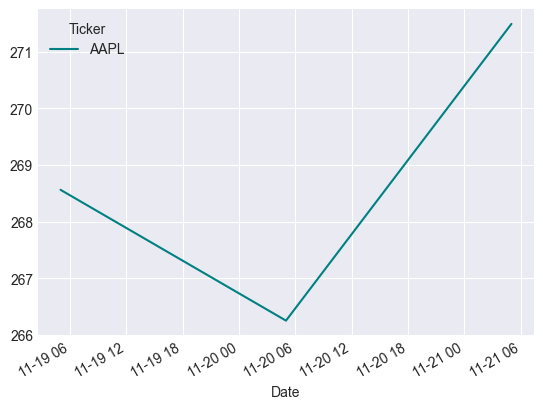

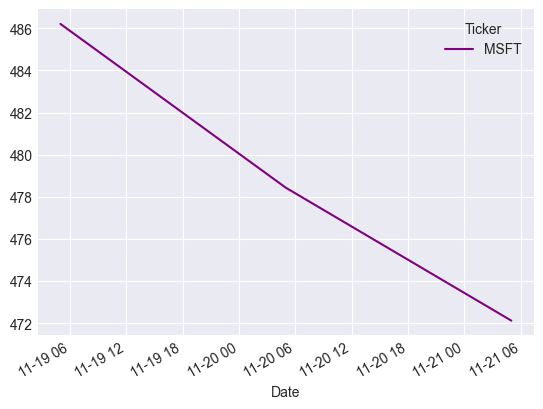

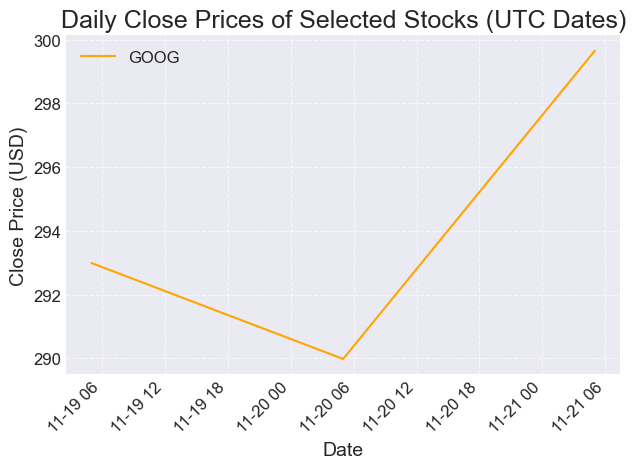

In [9]:

print("\n--- Partial Task 2: Visualization of a Sample Stock's Close Price ---")

if 'AAPL' in stock_data:
    plt.figure(figsize=(14, 7))
    stock_data['AAPL']['Close'].plot(label='AAPL Close', color='teal', linewidth=1.5)
    if 'MSFT' in stock_data:
        stock_data['MSFT']['Close'].plot(label='MSFT Close', color='purple', linewidth=1.5)
    if 'GOOG' in stock_data:
        stock_data['GOOG']['Close'].plot(label='GOOG Close', color='orange', linewidth=1.5)

    plt.title('Daily Close Prices of Selected Stocks (UTC Dates)', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Close Price (USD)', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough stock data available to generate a plot.")
